## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head(4)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0


### Q1 - Is the distribution of body temperatures normal? 
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

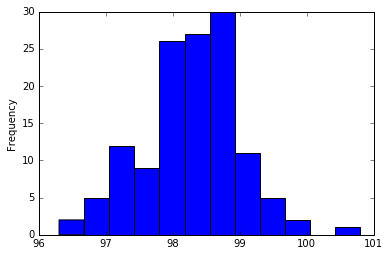

In [3]:
#I look at a histogram to get a first sense
df['temperature'].plot(kind='hist', bins=12)

#### Visually, the data looks like a normal distribution with a slight righthand skew. I can test this mathmatically.

In [4]:
# I run a mathematic test of the hypothesis that the temperatures are normal
import scipy.stats as stats
stats.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

#### The null hypothesis here is that the distribution of temperature is normal. If the pvalue was less than .05, it would mean that it was unlikely that our sample of temperatures is normal, disproving the null hypothesis. But since .25 is > .05, we can't disprove the presumption that the sample is normal.  I can proceed with the assumption of a normal distribution.

### Q2 Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

In [5]:
#first, I look at some basic attributes of our sample
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

#### Since the distribution is normal, I know the standard deviation, and the number of observations is more than 30, I will use a z-test.  This will test the hypothesis that the true population mean is 98.6 

In [6]:
#test the hypothesis that the true population mean is 98.6, using a z-test.
from statsmodels.stats.weightstats import ztest
results = ztest(df.temperature,value=98.6)
print("The p-value of the z-test is "+str(('%.08f' % results[1])))

The p-value of the z-test is 0.00000005


#### With such a tiny p-value, we can reject the hypothesis the true population mean temperature is 98.6.

### Q3 - At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

#### I calculate the 95% confidence interval, the range of values that any given observation will fall into 95% of the time.

In [7]:
import numpy as np
critical_value = 1.96
mean = df['temperature'].describe()['mean']
std = df['temperature'].describe()['std']
size = len(df)
std_err = std/np.sqrt(size)
mar_err = std_err * critical_value
ci_min = mean - mar_err
ci_max = mean + mar_err
print("The margin of error is "+str(round(mar_err,2)))
print("The confidence interval is "+str(round(ci_min,1))+" to "+str(round(ci_max,1)))

The margin of error is 0.13
The confidence interval is 98.1 to 98.4


#### Any temperature lower than 98.1 or higher than 98.4 can be considered abnormal.

### Q4 - Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing.

In [8]:
#split the data into two tables and count the observations in each
female = df[df.gender == 'F']['temperature']
male = df[df.gender == 'M']['temperature']
print("The sample contains "+str(female.count())+" females and "+str(male.count())+" males" )

The sample contains 65 females and 65 males


In [9]:
female.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [10]:
male.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

#### The two groups have the same number of observations in each group, but the mean body temperature is different. I want to know if there is a statitically significant difference between male and female body temperatures.  Since it is not important which group has higher temperatures, I will run a two-sided t-test.   My null hypothesis is that there is no difference between male and femaie body temperatures.

In [11]:
results = stats.ttest_ind(male, female, equal_var=False)
print("The p-value of the t-test is "+str(('%.08f' % results[1])))  

The p-value of the t-test is 0.02393826


#### Since the p-value is greater than .05, it is probable that there is a significant difference between male and female body temperatures.  I reject the null hypothesis.